1. Data Exploration and Processing

Import relevant libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import nltk
import re

Read the data

In [10]:
df = pd.read_csv('../dataset/samsung_dataset.csv')
df.head()

,product_title,user_name,rating,review,review_date
0,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",Amazon Customer,5.0,This phone is amazing I got one for my 13 year...,"September 1, 2024"
1,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",Lisa Cashner,5.0,This is a very nice phone. Samsung did a reall...,"April 26, 2024"
2,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",Amazon Customer,4.0,I bought this for my son and so fat in two wee...,"May 27, 2024"
3,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",Amazoner,5.0,I decided to wait to write a review because I ...,"May 19, 2024"
4,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",J.E.R,1.0,I bought this phone for my daughter June 14th ...,"August 18, 2024"


In [11]:
df.shape

(3191, 5)

Exploratory Data Analysis

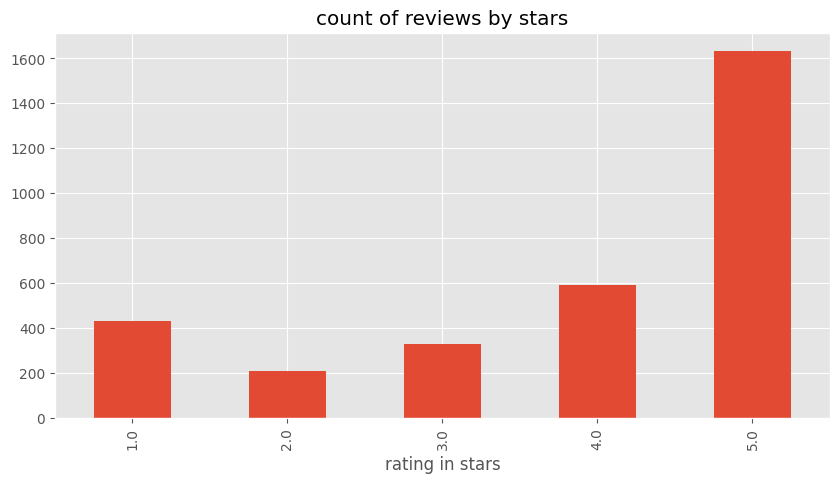

In [12]:
ax = df['rating'].value_counts().sort_index().plot(kind= 'bar' , 
                                        title= 'count of reviews by stars' , 
                                        figsize= (10,5))
ax.set_xlabel('rating in stars')
plt.show()

2. Data Pre-processing

Necessary NLTK resources

In [13]:
from nltk.corpus import stopwords


# nltk.data.path.append('c:/Users/Hasib282/anaconda/nltk_data')

nltk.download('vader_lexicon', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('words', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('maxent_ne_chunker', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('punkt', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('averaged_perceptron_tagger', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('stopwords', download_dir='c:/Users/Hasib282/anaconda/nltk_data')
nltk.download('punkt_tab', download_dir='c:/Users/Hasib282/anaconda/nltk_data')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     c:/Users/Hasib282/anaconda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nl

True

Clean product_title And user_name

In [33]:
def clean_product_title(product_title):
  cleaned_name = re.sub(r'[^\w\s]', '', product_title).strip()
  words = cleaned_name.split()
  return ' '.join(words[:3])

def clean_user_name(user_name):
  cleaned_name = re.sub(r'[^\w\s]', '', user_name).strip()
  words = cleaned_name.split()
  return ' '.join(words[:3])

df['product_title'] = df['product_title'].apply(clean_product_title)

df['user_name'] = df['user_name'].fillna("Amazon User")
df['user_name'] = df['user_name'].apply(clean_user_name)

Clean review

In [15]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'\d+','',text) # Remove numbers
    text = re.sub(r'[^\w\s]','',text) # Remove punctuation
    text = re.sub(r'\s+',' ' , text) # Remove extra spaces
    text = text.strip() # Strip leading and trailing spaces
    tokens  = nltk.word_tokenize(text) # Tokenize text
    filtered_words = [word for word in tokens if word not in stop_words] # Remove stop words
    return ' '.join(filtered_words) # Join filtered words back into a single string

# Apply clean_text function to the 'review' column
df['review'] = df['review'].apply(clean_text)

df['ID'] = range(1, len(df) + 1)

df.to_csv('samsung_clean_dataset.csv', index=False)

df

,product_title,user_name,rating,review,review_date,ID
0,SAMSUNG Galaxy A15,Amazon Customer,5.0,phone amazing got one year old one eleven year...,"September 1, 2024",1
1,SAMSUNG Galaxy A15,Lisa Cashner,5.0,nice phone samsung really good job onethe buil...,"April 26, 2024",2
2,SAMSUNG Galaxy A15,Amazon Customer,4.0,bought son fat two weeks loves battery life lo...,"May 27, 2024",3
3,SAMSUNG Galaxy A15,Amazoner,5.0,decided wait write review fence keeping previo...,"May 19, 2024",4
4,SAMSUNG Galaxy A15,JER,1.0,bought phone daughter june th phone working wo...,"August 18, 2024",5
...,...,...,...,...,...,...
3186,Samsung Galaxy J3,Leo Maneke,4.0,got phone brand new months ago sale local best...,"September 28, 2016",3187
3187,Samsung Galaxy J3,nearoffutt,1.0,owned phone half year memory always issue like...,"October 22, 2016",3188
3188,Samsung Galaxy J3,SammiJo Skinner,5.0,gone iphone samsung flip phone upgraded samsun...,"July 12, 2017",3189
3189,Samsung Galaxy J3,Meowkie,1.0,cracked screen days never dropped abuseddo buy...,"September 5, 2016",3190


3. VADER Model

Initialize VADER

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
example = df['review'] [10]
example

'purchased phone replace samsung phone definitely much faster complaint sound notifications miss nice features like using biometrics quickly access information yet spend time taking photos heard someone else camera good old phone'

In [18]:
sia.polarity_scores(example)

{'neg': 0.093, 'neu': 0.639, 'pos': 0.268, 'compound': 0.7964}

Apply Vader

In [19]:
#Run the polarity score on the whole dataset
res = {}
for i, row in tqdm(df.iterrows() , total= len(df)):
    review = row['review']
    myid   = row['ID']
    res[myid] = sia.polarity_scores(review)

res

100%|██████████| 3191/3191 [00:05<00:00, 591.69it/s]


{1: {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.9682},
 2: {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.9941},
 3: {'neg': 0.07, 'neu': 0.688, 'pos': 0.242, 'compound': 0.9001},
 4: {'neg': 0.031, 'neu': 0.689, 'pos': 0.28, 'compound': 0.9922},
 5: {'neg': 0.128, 'neu': 0.824, 'pos': 0.048, 'compound': -0.7106},
 6: {'neg': 0.127, 'neu': 0.685, 'pos': 0.188, 'compound': 0.5316},
 7: {'neg': 0.142, 'neu': 0.617, 'pos': 0.241, 'compound': 0.8445},
 8: {'neg': 0.11, 'neu': 0.608, 'pos': 0.282, 'compound': 0.9136},
 9: {'neg': 0.051, 'neu': 0.725, 'pos': 0.224, 'compound': 0.978},
 10: {'neg': 0.025, 'neu': 0.849, 'pos': 0.126, 'compound': 0.836},
 11: {'neg': 0.093, 'neu': 0.639, 'pos': 0.268, 'compound': 0.7964},
 12: {'neg': 0.041, 'neu': 0.747, 'pos': 0.212, 'compound': 0.9298},
 13: {'neg': 0.034, 'neu': 0.862, 'pos': 0.103, 'compound': 0.4915},
 14: {'neg': 0.058, 'neu': 0.722, 'pos': 0.22, 'compound': 0.9117},
 15: {'neg': 0.117, 'neu': 0.711, 'pos': 0.172, 'com

Plot VADER

In [20]:
vaders = pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index' : 'ID'})
vaders = vaders.merge(df,how='left')

vaders

,ID,neg,neu,pos,compound,product_title,user_name,rating,review,review_date
0,1,0.000,0.569,0.431,0.9682,SAMSUNG Galaxy A15,Amazon Customer,5.0,phone amazing got one year old one eleven year...,"September 1, 2024"
1,2,0.000,0.729,0.271,0.9941,SAMSUNG Galaxy A15,Lisa Cashner,5.0,nice phone samsung really good job onethe buil...,"April 26, 2024"
2,3,0.070,0.688,0.242,0.9001,SAMSUNG Galaxy A15,Amazon Customer,4.0,bought son fat two weeks loves battery life lo...,"May 27, 2024"
3,4,0.031,0.689,0.280,0.9922,SAMSUNG Galaxy A15,Amazoner,5.0,decided wait write review fence keeping previo...,"May 19, 2024"
4,5,0.128,0.824,0.048,-0.7106,SAMSUNG Galaxy A15,JER,1.0,bought phone daughter june th phone working wo...,"August 18, 2024"
...,...,...,...,...,...,...,...,...,...,...
3186,3187,0.057,0.690,0.253,0.9774,Samsung Galaxy J3,Leo Maneke,4.0,got phone brand new months ago sale local best...,"September 28, 2016"
3187,3188,0.044,0.899,0.058,0.1531,Samsung Galaxy J3,nearoffutt,1.0,owned phone half year memory always issue like...,"October 22, 2016"
3188,3189,0.000,0.876,0.124,0.7964,Samsung Galaxy J3,SammiJo Skinner,5.0,gone iphone samsung flip phone upgraded samsun...,"July 12, 2017"
3189,3190,0.000,1.000,0.000,0.0000,Samsung Galaxy J3,Meowkie,1.0,cracked screen days never dropped abuseddo buy...,"September 5, 2016"


Visualize VADER

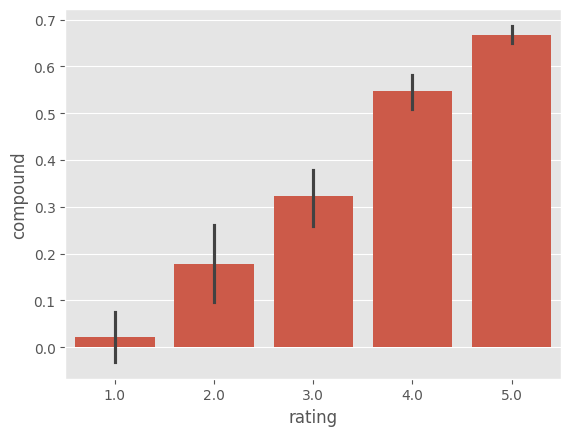

In [21]:
sns.barplot(data=vaders , x='rating' , y = 'compound')
ax.set_title('Compound score by Amazon star review')
plt.show()

Sub-plot for each category

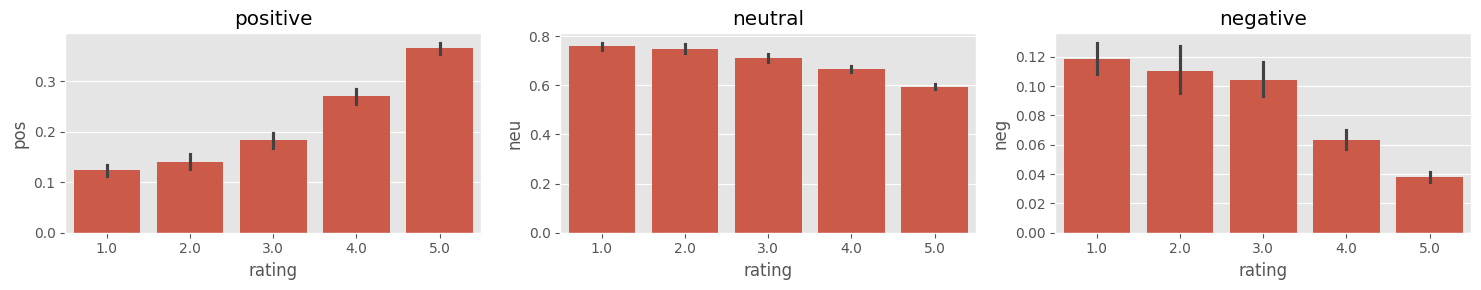

In [22]:
fig, axs=plt.subplots(1, 3 , figsize=(15 , 3))
sns.barplot(data=vaders , x='rating' , y= 'pos' , ax=axs[0])
sns.barplot(data=vaders , x='rating' , y= 'neu' , ax=axs[1])
sns.barplot(data=vaders , x='rating' , y= 'neg' , ax=axs[2])
axs[0].set_title('positive'),
axs[1].set_title('neutral'),
axs[2].set_title('negative'),
plt.tight_layout()
plt.show()

4. Roberta Pretrained Model

Install relevant modules

In [23]:
# pip install transformers
# pip install torch  
# pip install tensorflow   
# pip install flax 
# pip install --upgrade tensorflow-intel
# pip install ml-dtypes==0.2.0

In [24]:
import torch
import sys
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
print("sys path",sys.path)
print(f"PyTorch version: {torch.__version__}")

sys path ['e:\\PDF\\12th sem\\Thesis\\Project\\python-project', 'c:\\Users\\Hasib282\\anaconda\\python312.zip', 'c:\\Users\\Hasib282\\anaconda\\DLLs', 'c:\\Users\\Hasib282\\anaconda\\Lib', 'c:\\Users\\Hasib282\\anaconda', '', 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python312\\site-packages', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages\\win32', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Hasib282\\anaconda\\Lib\\site-packages\\Pythonwin']
PyTorch version: 2.4.1


Initializing Model

In [26]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

print("Model and tokenizer loaded successfully.")

c:\Users\Hasib282\anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model and tokenizer loaded successfully.


Apply Roberta model

In [27]:
# Apply on a single Data
encoded_text = tokenizer (example, return_tensors= 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores [0],
    'roberta_neu' : scores [1],
    'roberta_pos' : scores [2]
}
scores_dict

{'roberta_neg': 0.056400955,
 'roberta_neu': 0.21644832,
 'roberta_pos': 0.72715074}

In [28]:
# Create function for checking polarity score of roberta 
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt", padding="max_length", max_length=512, truncation=True)
    output = model(**encoded_text)
    rating = output[0][0].detach().numpy()
    rating = softmax(rating)
    rating_dict = {
        'roberta_neg': rating[0],
        'roberta_neu': rating[1],
        'roberta_pos': rating[2]
    }
    return rating_dict

In [29]:
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    review = row['review']
    myid   = row['ID']
    vader_result = sia.polarity_scores(review)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(review)
    both = {**vader_result_rename , **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f'Broke for Id {myid}')


100%|██████████| 3191/3191 [1:46:06<00:00,  2.00s/it]  


In [30]:
result_df = pd.DataFrame(res).T
result_df= result_df.reset_index().rename(columns={'index' : 'ID'})
result_df = result_df.merge(df,how='left')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
result_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product_title',
       'user_name', 'rating', 'review', 'review_date'],
      dtype='object')

Compare Results:

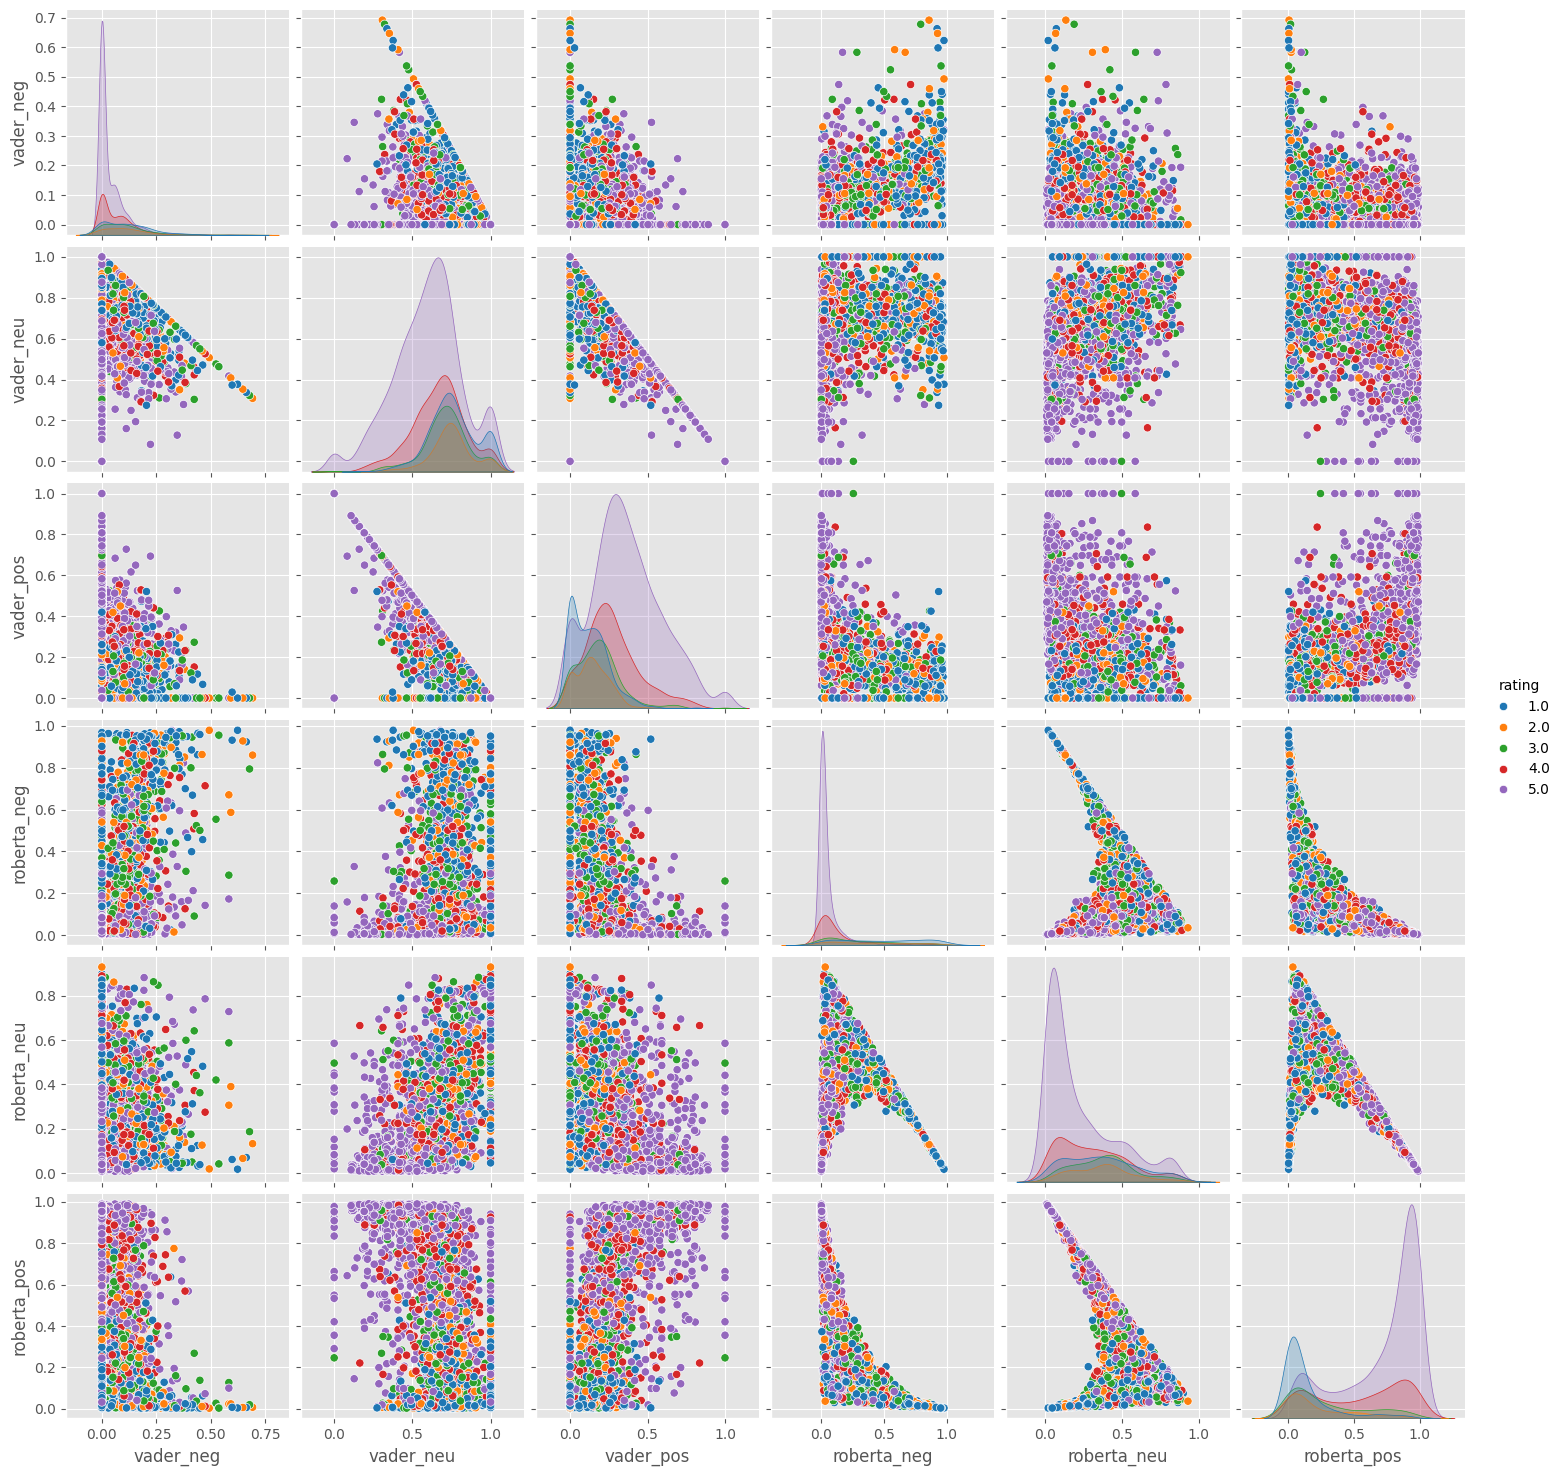

In [31]:
sns.pairplot(data=result_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='rating',
             palette="tab10")

plt.show()

In [34]:
result_df.to_csv('samsung_sentiment_result.csv', index=False)
new_df = result_df[['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'rating', 'review']]
new_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,rating,review
0,1,0.000,0.569,0.431,0.9682,0.002525,0.013612,0.983862,5.0,phone amazing got one year old one eleven year...
1,2,0.000,0.729,0.271,0.9941,0.010911,0.100349,0.888740,5.0,nice phone samsung really good job onethe buil...
2,3,0.070,0.688,0.242,0.9001,0.004104,0.044133,0.951763,4.0,bought son fat two weeks loves battery life lo...
3,4,0.031,0.689,0.280,0.9922,0.030194,0.200611,0.769195,5.0,decided wait write review fence keeping previo...
4,5,0.128,0.824,0.048,-0.7106,0.592280,0.359564,0.048156,1.0,bought phone daughter june th phone working wo...
5,6,0.127,0.685,0.188,0.5316,0.051040,0.364284,0.584676,5.0,isnt flagship phone adequate price tag screen ...
6,7,0.142,0.617,0.241,0.8445,0.288653,0.418535,0.292812,3.0,yes works complaints touchscreen biggest probl...
7,8,0.110,0.608,0.282,0.9136,0.009497,0.041412,0.949091,5.0,enjoying new samsung phone good phone transfer...
8,9,0.051,0.725,0.224,0.9780,0.086136,0.423720,0.490144,5.0,uses phone great deal use phone email text acc...
9,10,0.025,0.849,0.126,0.8360,0.033705,0.358349,0.607946,4.0,got smartphone alternative getting iphone pro ...
